# Import Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.feature_importance import mean_score_decrease

# Import Data

In [2]:
df = pd.read_csv("dataset/dataset.csv")
df.head(20)

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius
0,2018-12-31,Kepulauan Seribu,Siang,Hujan Lokal,70 - 90,24 - 32
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan Lokal,70 - 90,24 - 32
2,2018-12-31,Kepulauan Seribu,Malam,Hujan Lokal,70 - 90,24 - 32
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan Ringan,70 - 90,24 - 32
4,2018-12-31,Jakarta Utara,Siang,Hujan Lokal,70 - 90,24 - 32
5,2018-12-31,Jakarta Utara,Pagi,Berawan,70 - 90,24 - 32
6,2018-12-31,Jakarta Utara,Malam,Berawan,70 - 90,24 - 32
7,2018-12-31,Jakarta Utara,Dini Hari,Hujan Lokal,70 - 90,24 - 32
8,2018-12-31,Jakarta Timur,Siang,Hujan Lokal,70 - 90,24 - 32
9,2018-12-31,Jakarta Timur,Pagi,Berawan,70 - 90,24 - 32


# Praprocessing

### Jumlah Baris dan Kolom

In [3]:
df.shape

(8535, 6)

### Melihat Missing Value

In [4]:
df.isnull().sum()

tanggal                 135
wilayah                 135
waktu                   135
cuaca                   135
kelembaban_persen       135
suhu_derajat_celcius    135
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

tanggal                 0
wilayah                 0
waktu                   0
cuaca                   0
kelembaban_persen       0
suhu_derajat_celcius    0
dtype: int64

### Melihat Kembali Jumlah Baris dan Kolom

In [6]:
df.shape

(8400, 6)

### Mengubah value dari kolom Cuaca

In [7]:
df["cuaca"].unique()

array(['Hujan Lokal', 'Hujan Ringan', 'Berawan', 'Cerah Berawan', 'Cerah',
       'Berawan Tebal', 'Hujan Sedang', 'Cerah Berawn', 'Cerang Berawan',
       'Beawan', 'Berawan ', 'Hujan Petir', 'Hujan Lokal ',
       'Cerah Berawan ', 'Cerah ', 'Cerah Berawah', 'Cerah  ', ' Berawan',
       'Hujan', 'Hujan Petir ', 'Hujan Sedang ', 'Cerah berawan',
       'Hujan Ringanl', 'Berawa', 'Hujang Sedang', 'Hujan Loka',
       'Hujan Ringan '], dtype=object)

### Menggunakan Regex untuk mengelompokkan jenis Cuaca

In [8]:
import re

def cuaca(x):
  if (re.findall("Cerah", x)):
    return 'Cerah'
  elif (re.findall("Hujan", x)):
    return 'Hujan'
  elif (re.findall("Berawan", x)):
    return 'Berawan'
  else:
    return 'Tidak Teridentifikasi'

df["cuaca"] = df['cuaca'].apply(cuaca)
df["cuaca"].value_counts()

Cerah                    3796
Berawan                  2896
Hujan                    1706
Tidak Teridentifikasi       2
Name: cuaca, dtype: int64

In [9]:
df.waktu.value_counts()

Siang        1758
Pagi         1758
Malam        1758
Dini Hari    1758
siang         342
pagi          342
malam         342
dini hari     342
Name: waktu, dtype: int64

In [10]:
import re

def cuaca(x):
  if (re.findall("dini hari", x)):
    return 'Dini Hari'
  elif (re.findall("siang", x)):
    return 'Siang'
  elif (re.findall("pagi", x)):
    return 'Pagi'
  elif (re.findall("malam", x)):
    return 'Malam'
  else:
    return x

df["waktu"] = df['waktu'].apply(cuaca)
df["waktu"].value_counts()

Siang        2100
Pagi         2100
Malam        2100
Dini Hari    2100
Name: waktu, dtype: int64

### Drop Data

In [11]:
df[df["cuaca"] == "Tidak Teridentifikasi"].index

Int64Index([358, 7011], dtype='int64')

In [12]:
df.drop(df[df["cuaca"] == "Tidak Teridentifikasi"].index, inplace=True)
df["cuaca"].unique()

array(['Hujan', 'Berawan', 'Cerah'], dtype=object)

Split Data Kelembaban menjadi Kelembapan Minimal dan Maximal

In [13]:
df["kelembapan_min"] = df['kelembaban_persen'].apply(lambda x: x.split("-")[0])
df["kelembapan_min"] = [x.strip(' ') for x in df["kelembapan_min"]]

df["kelembapan_max"] = df['kelembaban_persen'].apply(lambda x: x.split("-")[1])
df["kelembapan_max"] = [x.strip(' ') for x in df["kelembapan_max"]]

df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,kelembapan_min,kelembapan_max
0,2018-12-31,Kepulauan Seribu,Siang,Hujan,70 - 90,24 - 32,70,90
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan,70 - 90,24 - 32,70,90
2,2018-12-31,Kepulauan Seribu,Malam,Hujan,70 - 90,24 - 32,70,90
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan,70 - 90,24 - 32,70,90
4,2018-12-31,Jakarta Utara,Siang,Hujan,70 - 90,24 - 32,70,90


In [14]:
df["suhu_min"] = df.suhu_derajat_celcius.apply(lambda x: x.split("-")[0])
df["suhu_min"] = [x.strip(' ') for x in df["suhu_min"]]

df["suhu_max"] = df.suhu_derajat_celcius.apply(lambda x: x.split("-")[1])
df["suhu_max"] = [x.strip(' ') for x in df["suhu_max"]]

df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,kelembapan_min,kelembapan_max,suhu_min,suhu_max
0,2018-12-31,Kepulauan Seribu,Siang,Hujan,70 - 90,24 - 32,70,90,24,32
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan,70 - 90,24 - 32,70,90,24,32
2,2018-12-31,Kepulauan Seribu,Malam,Hujan,70 - 90,24 - 32,70,90,24,32
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan,70 - 90,24 - 32,70,90,24,32
4,2018-12-31,Jakarta Utara,Siang,Hujan,70 - 90,24 - 32,70,90,24,32


Melihat Masing Masing Data dari Suhu

In [15]:
print('Suhu Min\n', df['suhu_min'].value_counts(), '\n')
print('Suhu Max\n', df['suhu_max'].value_counts(), '\n')

Suhu Min
 24    4102
23    3072
25     576
22     552
21      48
20      24
26      24
Name: suhu_min, dtype: int64 

Suhu Max
 33    3431
32    1991
34    1440
31     696
30     360
35     288
29     120
28      72
Name: suhu_max, dtype: int64 



Melihat Masing Masing Data dari Kelembapan

In [16]:
print('Kelembapan Min\n', df['kelembapan_min'].value_counts(), '\n\n')
print('Kelembapan Min\n', df['kelembapan_max'].value_counts(), '\n')

Kelembapan Min
 70    1727
55    1296
65    1272
60    1224
75     839
45     624
50     600
80     480
40     192
35      96
85      48
Name: kelembapan_min, dtype: int64 


Kelembapan Min
 95     3264
90     2375
85     1128
100    1031
80      504
75       96
Name: kelembapan_max, dtype: int64 



# Tahap Praprocessing 2

In [17]:
df.head(50)

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,kelembapan_min,kelembapan_max,suhu_min,suhu_max
0,2018-12-31,Kepulauan Seribu,Siang,Hujan,70 - 90,24 - 32,70,90,24,32
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan,70 - 90,24 - 32,70,90,24,32
2,2018-12-31,Kepulauan Seribu,Malam,Hujan,70 - 90,24 - 32,70,90,24,32
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan,70 - 90,24 - 32,70,90,24,32
4,2018-12-31,Jakarta Utara,Siang,Hujan,70 - 90,24 - 32,70,90,24,32
5,2018-12-31,Jakarta Utara,Pagi,Berawan,70 - 90,24 - 32,70,90,24,32
6,2018-12-31,Jakarta Utara,Malam,Berawan,70 - 90,24 - 32,70,90,24,32
7,2018-12-31,Jakarta Utara,Dini Hari,Hujan,70 - 90,24 - 32,70,90,24,32
8,2018-12-31,Jakarta Timur,Siang,Hujan,70 - 90,24 - 32,70,90,24,32
9,2018-12-31,Jakarta Timur,Pagi,Berawan,70 - 90,24 - 32,70,90,24,32


### Drop Kolom

In [18]:
df.drop(columns=["kelembaban_persen", "suhu_derajat_celcius", "tanggal"], inplace=True)

In [19]:
df.wilayah.value_counts()

Jakarta Utara       1400
Jakarta Timur       1400
Jakarta Selatan     1400
Jakarta Pusat       1400
Kepulauan Seribu    1399
Jakarta Barat       1399
Name: wilayah, dtype: int64

### Mengubah Tipe Data

In [20]:
df.dtypes

wilayah           object
waktu             object
cuaca             object
kelembapan_min    object
kelembapan_max    object
suhu_min          object
suhu_max          object
dtype: object

In [21]:
df["kelembapan_min"] = df.kelembapan_min.astype(int)
df["kelembapan_max"] = df.kelembapan_max.astype(int)
df["suhu_min"] = df.suhu_min.astype(int)
df["suhu_max"] = df.suhu_max.astype(int)
df.dtypes

wilayah           object
waktu             object
cuaca             object
kelembapan_min     int32
kelembapan_max     int32
suhu_min           int32
suhu_max           int32
dtype: object

# Visualisasi Data

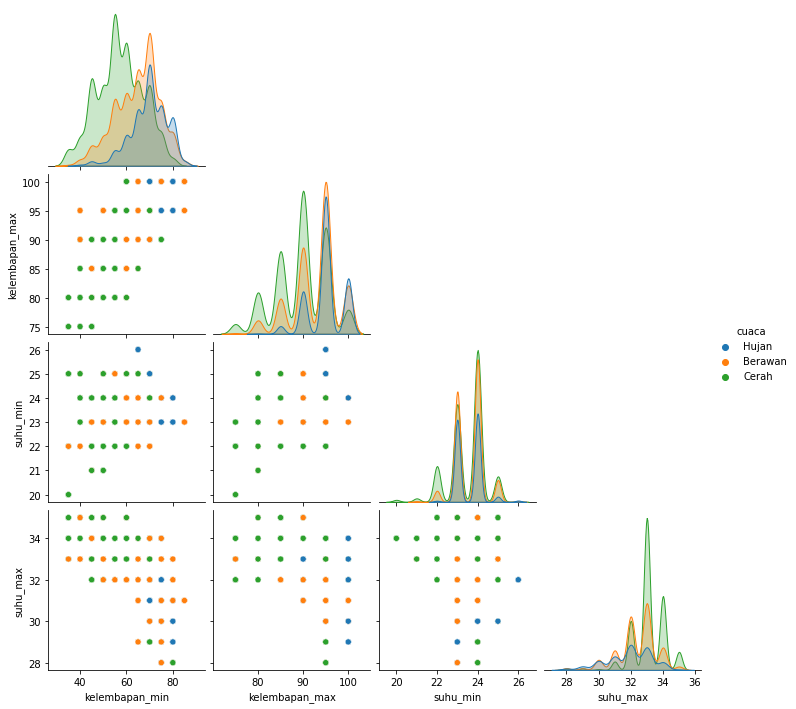

In [22]:
sns.pairplot(df, hue="cuaca", corner=True)

# Target Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["cuaca"] = le.fit_transform(df['cuaca'])
df['cuaca'].value_counts()

1    3796
0    2896
2    1706
Name: cuaca, dtype: int64

# Membuat Kolom Rata Rata untuk Suhu dan Kelembapan

In [24]:
df['kelembapan_mean'] = (df['kelembapan_min'] + df['kelembapan_max']) / 2
df['suhu_mean'] = (df['suhu_min'] + df['suhu_max']) / 2

df.drop(columns=["kelembapan_min", "kelembapan_max", "suhu_min", 'suhu_max'], inplace=True)

# Splitting Data

In [25]:
X = df.drop(columns=["cuaca"])
y = df["cuaca"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6718, 4), (1680, 4), (6718,), (1680,))

# Tahap Preprocessing 3

In [26]:
X_train.head()

,wilayah,waktu,kelembapan_mean,suhu_mean
6360,Kepulauan Seribu,Siang,80.0,28.0
6653,Jakarta Utara,Pagi,80.0,27.5
8034,Jakarta Pusat,Malam,80.0,27.5
7515,Kepulauan Seribu,Dini Hari,85.0,25.5
6849,Jakarta Timur,Pagi,87.5,27.0


### Dummies Encoding

In [27]:
X_train = pd.get_dummies(X_train, columns=["waktu", "wilayah"])
X_test = pd.get_dummies(X_test, columns=["waktu", "wilayah"])

In [28]:
X_train.head()

,kelembapan_mean,suhu_mean,waktu_Dini Hari,waktu_Malam,waktu_Pagi,waktu_Siang,wilayah_Jakarta Barat,wilayah_Jakarta Pusat,wilayah_Jakarta Selatan,wilayah_Jakarta Timur,wilayah_Jakarta Utara,wilayah_Kepulauan Seribu
6360,80.0,28.0,0,0,0,1,0,0,0,0,0,1
6653,80.0,27.5,0,0,1,0,0,0,0,0,1,0
8034,80.0,27.5,0,1,0,0,0,1,0,0,0,0
7515,85.0,25.5,1,0,0,0,0,0,0,0,0,1
6849,87.5,27.0,0,0,1,0,0,0,0,1,0,0


In [29]:
X_test.head()

,kelembapan_mean,suhu_mean,waktu_Dini Hari,waktu_Malam,waktu_Pagi,waktu_Siang,wilayah_Jakarta Barat,wilayah_Jakarta Pusat,wilayah_Jakarta Selatan,wilayah_Jakarta Timur,wilayah_Jakarta Utara,wilayah_Kepulauan Seribu
3816,70.0,28.5,0,0,0,1,0,0,0,0,0,1
5098,87.5,28.5,0,1,0,0,0,0,0,1,0,0
7385,77.5,27.5,0,0,1,0,0,1,0,0,0,0
1181,70.0,29.0,0,0,1,0,0,0,0,0,1,0
3456,62.5,27.0,0,0,0,1,0,0,0,0,0,1


# Fitting Data

### Random Forest

In [42]:
paramater = {
    'n_estimators': [100, 150, 200],
    'max_depth': [20, 50, 80],
    'max_features': [0.3, 0.6, 0.8],
    'min_samples_leaf': [1, 5, 10]
}

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

RF = RandomForestClassifier(n_jobs=-1, random_state=42)

model = GridSearchCV(RF, paramater, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_train, y_pred_train), "\n")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'max_depth': 20, 'max_features': 0.6, 'min_samples_leaf': 10, 'n_estimators': 150}
[[298 217  64]
 [147 571  42]
 [109  43 189]] 

              precision    recall  f1-score   support

           0       0.59      0.59      0.59      2317
           1       0.73      0.76      0.75      3036
           2       0.67      0.61      0.64      1365

    accuracy                           0.67      6718
   macro avg       0.66      0.65      0.66      6718
weighted avg       0.67      0.67      0.67      6718
 

              precision    recall  f1-score   support

           0       0.54      0.51      0.53       579
           1       0.69      0.75      0.72       760
           2       0.64      0.55      0.59       341

    accuracy                           0.63      1680
   macro avg       0.62      0.61      0.61      1680
weighted avg       0.63      0.63      0.63      1680



Akurasi Training 67% <br>
Akurasi Testing 63% <br>

### Support Vector Machine

In [32]:
paramater = {
    'gamma': [1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03],
    'C': [1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]
}

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

SVM = SVC(max_iter=1000, random_state=42)

model = GridSearchCV(SVM, paramater, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_train, y_pred_train), "\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


D:\Python\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'C': 1.0, 'gamma': 1.0}
[[218 288  73]
 [134 585  41]
 [ 83  68 190]] 

              precision    recall  f1-score   support

           0       0.60      0.47      0.53      2317
           1       0.68      0.81      0.74      3036
           2       0.68      0.63      0.65      1365

    accuracy                           0.66      6718
   macro avg       0.65      0.64      0.64      6718
weighted avg       0.65      0.66      0.65      6718
 

              precision    recall  f1-score   support

           0       0.50      0.38      0.43       579
           1       0.62      0.77      0.69       760
           2       0.62      0.56      0.59       341

    accuracy                           0.59      1680
   macro avg       0.58      0.57      0.57      1680
weighted avg       0.58      0.59      0.58      1680



Akurasi Training 66% <br>
Akurasi Testing 59% <br>

### MLP Classifier

In [51]:
paramater = {
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
    'hidden_layer_sizes': [(9,8), (9,9), (8,8), (8,12), (9, 10), (9, 7)],
}

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

MLPC = MLPClassifier(max_iter=5000, random_state=42)

model = GridSearchCV(MLPC, paramater, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_train, y_pred_train), "\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
{'alpha': 10.0, 'hidden_layer_sizes': (9, 8), 'solver': 'lbfgs'}
[[265 263  51]
 [146 584  30]
 [115  52 174]] 

              precision    recall  f1-score   support

           0       0.50      0.49      0.50      2317
           1       0.68      0.78      0.72      3036
           2       0.67      0.47      0.56      1365

    accuracy                           0.62      6718
   macro avg       0.62      0.58      0.59      6718
weighted avg       0.62      0.62      0.61      6718
 

              precision    recall  f1-score   support

           0       0.50      0.46      0.48       579
           1       0.65      0.77      0.70       760
           2       0.68      0.51      0.58       341

    accuracy                           0.61      1680
   macro avg       0.61      0.58      0.59      1680
weighted avg       0.61      0.61      0.60      1680



Akurasi Training 62% <br>
Akurasi Testing 61% <br>

### KNN Classifier

In [36]:
paramater = {
    'n_neighbors': [1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],
    'weights': ['uniform', 'distance'],
    'p': [1, 1.5, 2]
}

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

KNN = KNeighborsClassifier()

model = GridSearchCV(KNN, paramater, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_train, y_pred_train), "\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 90 candidates, totalling 270 fits
{'n_neighbors': 17, 'p': 1.5, 'weights': 'uniform'}
[[298 221  60]
 [164 555  41]
 [112  47 182]] 

              precision    recall  f1-score   support

           0       0.57      0.57      0.57      2317
           1       0.72      0.76      0.74      3036
           2       0.68      0.58      0.63      1365

    accuracy                           0.66      6718
   macro avg       0.65      0.64      0.64      6718
weighted avg       0.66      0.66      0.66      6718
 

              precision    recall  f1-score   support

           0       0.52      0.51      0.52       579
           1       0.67      0.73      0.70       760
           2       0.64      0.53      0.58       341

    accuracy                           0.62      1680
   macro avg       0.61      0.59      0.60      1680
weighted avg       0.61      0.62      0.61      1680



Akurasi Training 66% <br>
Akurasi Testing 62% <br>

### Decision Tree Classifier

In [38]:
paramater = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

DTC = DecisionTreeClassifier(random_state=42)

model = GridSearchCV(DTC, paramater, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_train, y_pred_train), "\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 5760 candidates, totalling 17280 fits
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 'best'}
[[331 204  44]
 [166 553  41]
 [130  48 163]] 

              precision    recall  f1-score   support

           0       0.54      0.61      0.57      2317
           1       0.72      0.75      0.74      3036
           2       0.71      0.50      0.59      1365

    accuracy                           0.65      6718
   macro avg       0.66      0.62      0.63      6718
weighted avg       0.66      0.65      0.65      6718
 

              precision    recall  f1-score   support

           0       0.53      0.57      0.55       579
           1       0.69      0.73      0.71       760
           2       0.66      0.48      0.55       341

    accuracy                           0.62      1680
   macro avg       0.62      0.59      0.60      1680
weighted avg       0.63      0.62      0.62      1680



Akurasi Training 65% <br>
Akurasi Testing 62% <br>

### XGBoost Classifier

In [40]:
from jcopml.tuning.space import Integer, Real

parameter = {
    'max_depth': Integer(low=1, high=10),
    'learning_rate': Real(low=-2, high=0, prior='log-uniform'),
    'n_estimators': Integer(low=100, high=200),
    'subsample': Real(low=0.3, high=0.8, prior='uniform'),
    'gamma': Integer(low=1, high=10),
    'colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
    'reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
    'reg_lambda': Real(low=-3, high=1, prior='log-uniform')
}

In [41]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

XGB = XGBClassifier(n_jobs=-1, random_state=42, use_label_encoder=False)

model = RandomizedSearchCV(XGB, parameter, cv=3, n_iter=500, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_train, y_pred_train), "\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
[18:33:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 0.8264399836283943, 'gamma': 2, 'learning_rate': 0.02309289502807683, 'max_depth': 7, 'n_estimators': 195, 'reg_alpha': 0.021300875871296154, 'reg_lambda': 0.023292431232332232, 'subsample': 0.6695132788939794}
[[302 222  55]
 [136 593  31]
 [112  51 178]] 

              precision    recall  f1-score   support

           0       0.56      0.57      0.57      2317
           1       0.71      0.77      0.74      3036
           2       0.69      0.56      0.62      1365

    accuracy                           0.66      6718
   macro avg       0.66      0.63      0.64      6718
weighted avg       

Akurasi Training 66% <br>
Akurasi Testing 64% <br>